In [ ]:
# Họ và Tên: Trần Hưng Thịnh
# MSSV: 2174802010621

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [ ]:
#Bước 1: Load data
def load_dataset():
    X, y = load_iris(return_X_y=True)
    X = X[y!=2]
    y = y[y!=2]
    return X,y
#Điền ở đây
X,y = load_dataset()
print(X.shape ,y.shape )

(100, 4) (100,)


Kết quả: (100, 4) (100,)

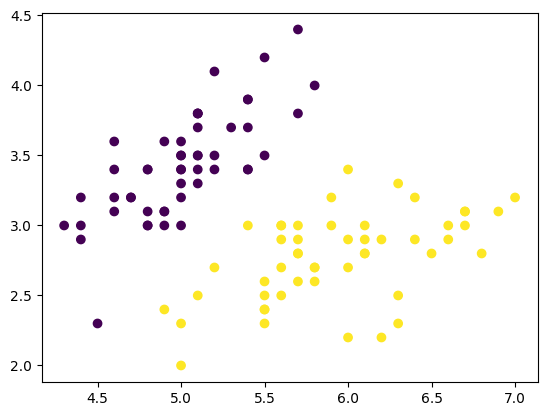

In [ ]:
#Trực quan hóa dữ liệu data
#Điền code ở đây
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

Kết quả

![image.png](attachment:image.png)

In [ ]:
# Bước 2: Định nghĩa mô hình hồi quy logistic bằng PyTorch
class LogisticRegressTorch(nn.Module):
    def __init__(self, n_features):
        super(LogisticRegressTorch, self).__init__()
        #Điền ở đây theo comment                # tạo một lớp tuyến tính (nn.Linear) với n_features đầu vào và 1 đầu ra

        self.linear = nn.Linear(n_features,1)
    def forward(self, x):
        return torch.sigmoid(self.linear(x))


In [ ]:
# Bước 3: Định nghĩa lớp dữ liệu
class IrisTorch(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)


    def __len__(self):
        return len(self.X) #Điền ở đây theo comment            #trả về số lượng mẫu trong tập dữ liệu (số lượng hàng trong self.X)

    def __getitem__(self, idx):
        x,y = self.X[idx], self.y[idx]
        return x,y #Điền ở đây theo comment            #trả về một cặp đặc trưng và nhãn tương ứng với chỉ số idx

In [ ]:
# Tạo dữ liệu
dataset = IrisTorch(X,y)

In [ ]:
# Bước 4: Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra bằng cách chia ngẫu nhiên 70,30.
train_size = 70 / dataset.__len__()                                              #70%
test_size =  30 / dataset.__len__()                                             #30%
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [ ]:
# Tạo DataLoader
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(test_dataset,batch_size = batch_size, shuffle = True)

In [ ]:
# Bước 5: Định nghĩa criterion và optimizer
n_features = X.shape[1]
model = LogisticRegressTorch(n_features)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(),lr=1e-2)

In [ ]:
# Huấn luyện mô hình
n_epochs = 200
train_losses = []
test_losses = []
test_accuracies = []

for epoch in range(n_epochs):
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)

    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # Đánh giá trên tập kiểm tra
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item() * inputs.size(0)

            predicted = (outputs >= 0.5).float()
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    accuracy = correct / total
    test_accuracies.append(accuracy)

    print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.4f}')

Epoch 1/200, Train Loss: 1.6131, Test Loss: 1.6055, Test Accuracy: 0.4333
Epoch 2/200, Train Loss: 1.3390, Test Loss: 1.3345, Test Accuracy: 0.4333
Epoch 3/200, Train Loss: 1.1329, Test Loss: 1.1964, Test Accuracy: 0.4333
Epoch 4/200, Train Loss: 1.0246, Test Loss: 1.0729, Test Accuracy: 0.4333
Epoch 5/200, Train Loss: 0.9230, Test Loss: 0.8952, Test Accuracy: 0.4333
Epoch 6/200, Train Loss: 0.7894, Test Loss: 0.7731, Test Accuracy: 0.4333
Epoch 7/200, Train Loss: 0.6967, Test Loss: 0.6431, Test Accuracy: 0.4333
Epoch 8/200, Train Loss: 0.6081, Test Loss: 0.5832, Test Accuracy: 0.6333
Epoch 9/200, Train Loss: 0.5700, Test Loss: 0.5549, Test Accuracy: 0.9667
Epoch 10/200, Train Loss: 0.5515, Test Loss: 0.5255, Test Accuracy: 1.0000
Epoch 11/200, Train Loss: 0.5353, Test Loss: 0.5129, Test Accuracy: 1.0000
Epoch 12/200, Train Loss: 0.5271, Test Loss: 0.5024, Test Accuracy: 1.0000
Epoch 13/200, Train Loss: 0.5201, Test Loss: 0.4944, Test Accuracy: 1.0000
Epoch 14/200, Train Loss: 0.5142, 

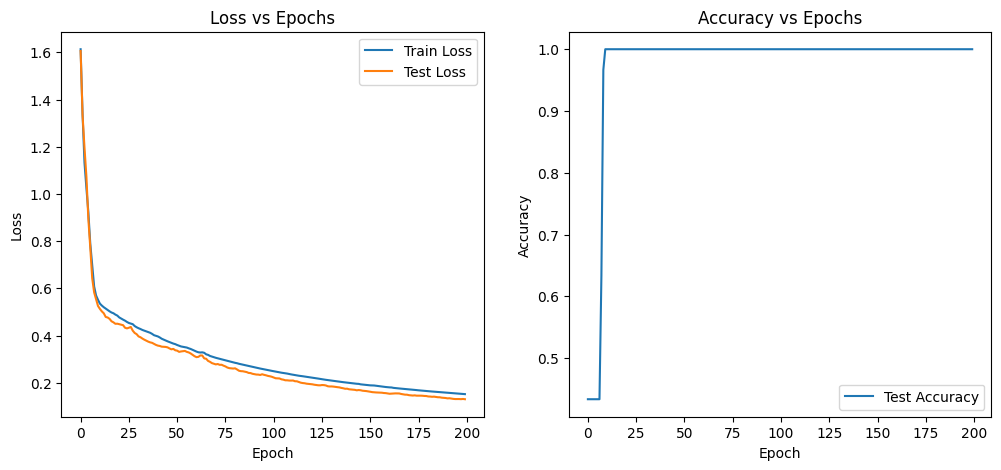

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epochs')

plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Epochs')

plt.show()

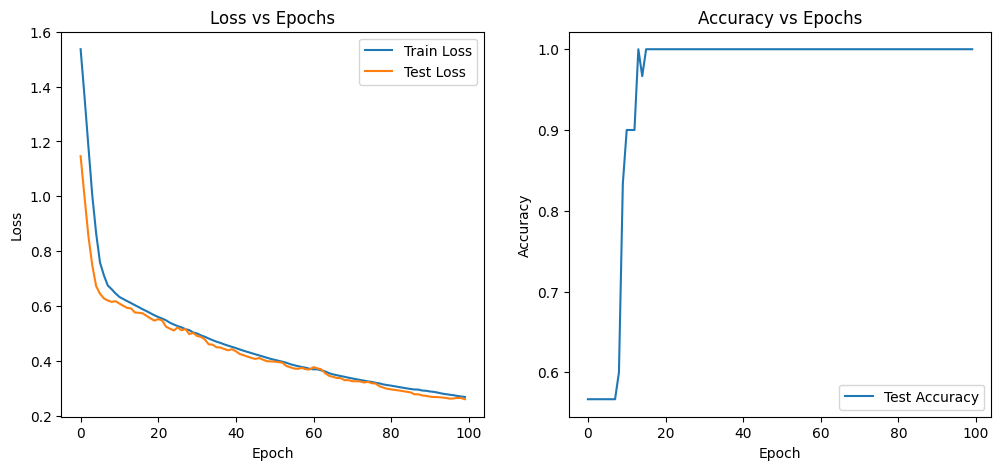

In [ ]:
# Vẽ biểu đồ loss và accuracy


#Kết quả:

![image.png](attachment:image.png)